In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

## Revisiting the results from our quiz in the beginning:

What kind of learning problem do we have here:
- [x] Supervised Learning
- [ ] Unsupervised Learning
- [ ] Reinforcement Learning

What is our target here:
- [ ] Regression
- [x] Classification
- [ ] Clustering

We can now choose a machine learning algorithm from the [sklearn webpage](https://scikit-learn.org).
Let us start with a `DecisionTreeClassifier` as it is easy to understand and can provide us with a lot of valuable insights.

In [5]:
from sklearn.tree import DecisionTreeClassifier
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

In [6]:
decision_tree = DecisionTreeClassifier()
df = df.fillna(0)
decision_tree.fit(df[features], df["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
tree.score(df[features], df["Survived"])

0.957351290684624

Nice you trained your first machine learning algorithm and it can really well predict who survives and who doesn't! But how does it do that and is it actually that awesome or did we do something wrong?
Let us have a look in how the algorithm decides who dies and who doesn't.

In [60]:
from typing import List

import graphviz
import numpy as np

from matplotlib import pyplot as plt
from sklearn import tree

def train_classifier_and_plot_decision_boundaries(
    df: pd.DataFrame,
    x_column: str,
    y_column: str,
    max_depth: int
) -> DecisionTreeClassifier:

    target_column = "Survived"
    # Parameters
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.5

    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    decision_tree.fit(df[[x_column, y_column]], df[target_column])

    target_names = ["Deceased", "Survived"]

    x_min = df[x_column].min() - 1
    x_max = df[x_column].max() + 1
    y_min = df[y_column].min() - 1
    y_max = df[y_column].max() + 1
    y_max = y_max if y_max < 200 else 200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.figure(figsize=(16,12))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.ylim([y_min, y_max])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(df[target_column] == i)
        plt.scatter(df.iloc[idx][x_column], df.iloc[idx][y_column], c=color, label=target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=30)
        
    return decision_tree

def show_decisions(decision_tree: DecisionTreeClassifier, features: List[str]):
    dot_data = tree.export_graphviz(
        decision_tree,
        out_file=None, 
        feature_names=features,  
        class_names=["Deceased", "Survived"],  
        filled=True,
        rounded=True,  
        special_characters=True)  
    graph = graphviz.Source(dot_data)   
    return graph

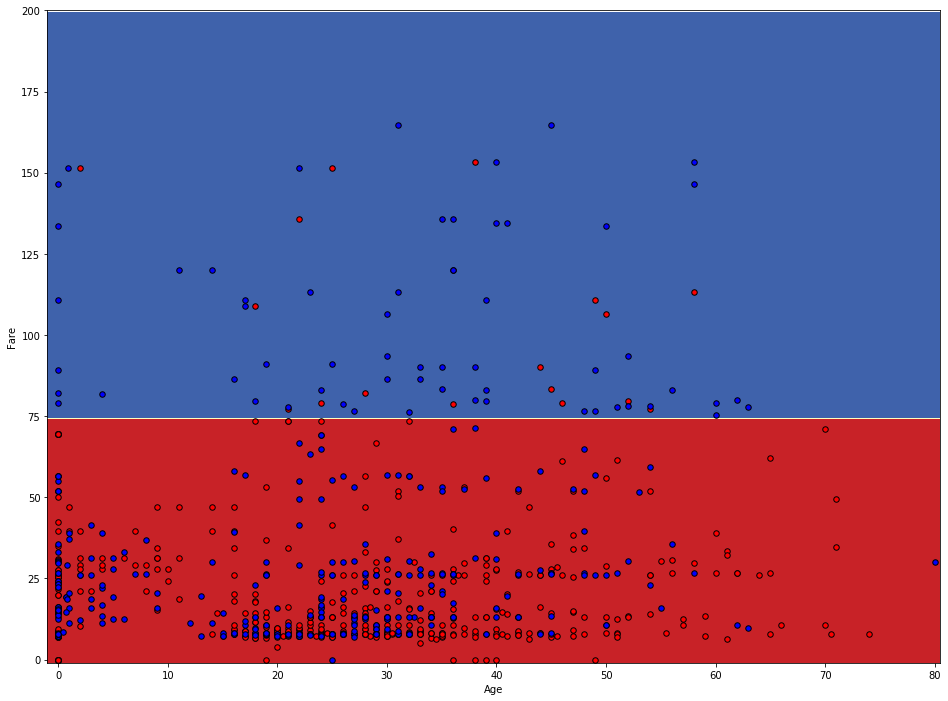

In [61]:
decision_tree = train_classifier_and_plot_decision_boundaries(df, "Age", "Fare", 2)

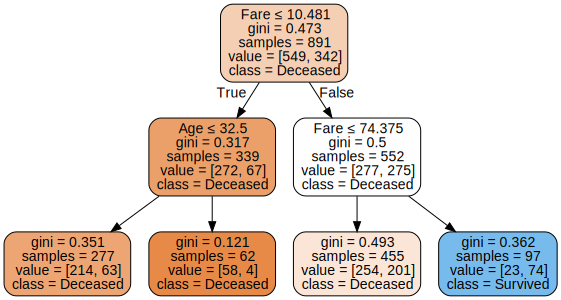

In [62]:
show_decisions(decision_tree, ["Age", "Fare"])

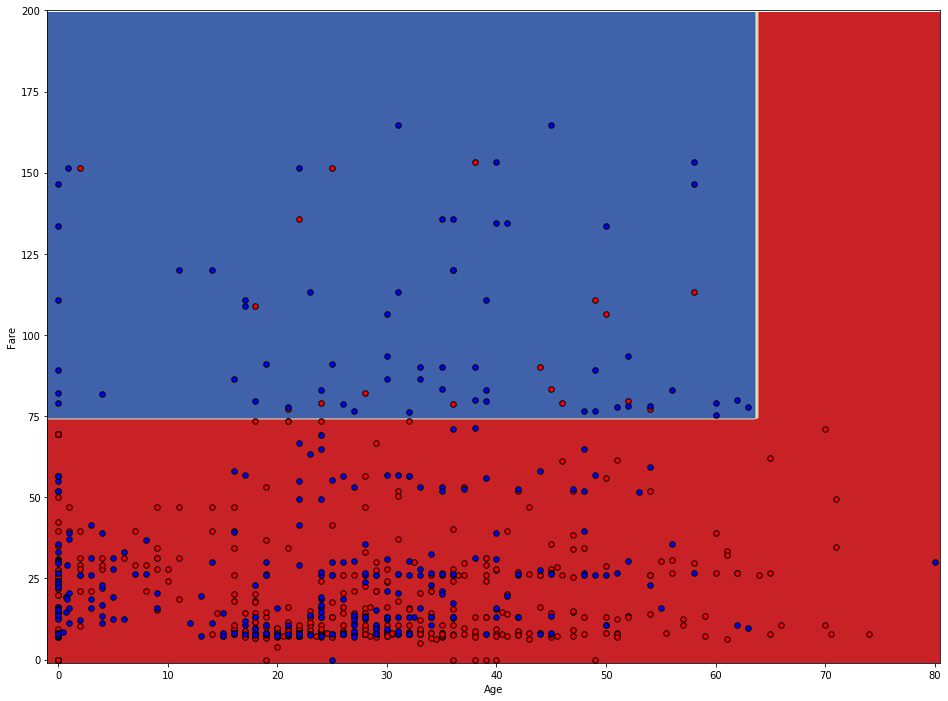

In [65]:
decision_tree = train_classifier_and_plot_decision_boundaries(df, "Age", "Fare", 3)

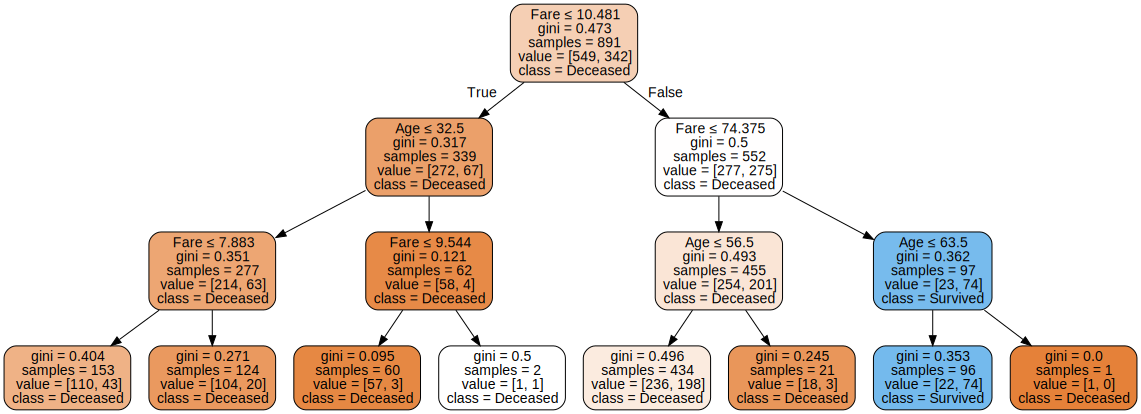

In [66]:
show_decisions(decision_tree, ["Age", "Fare"])

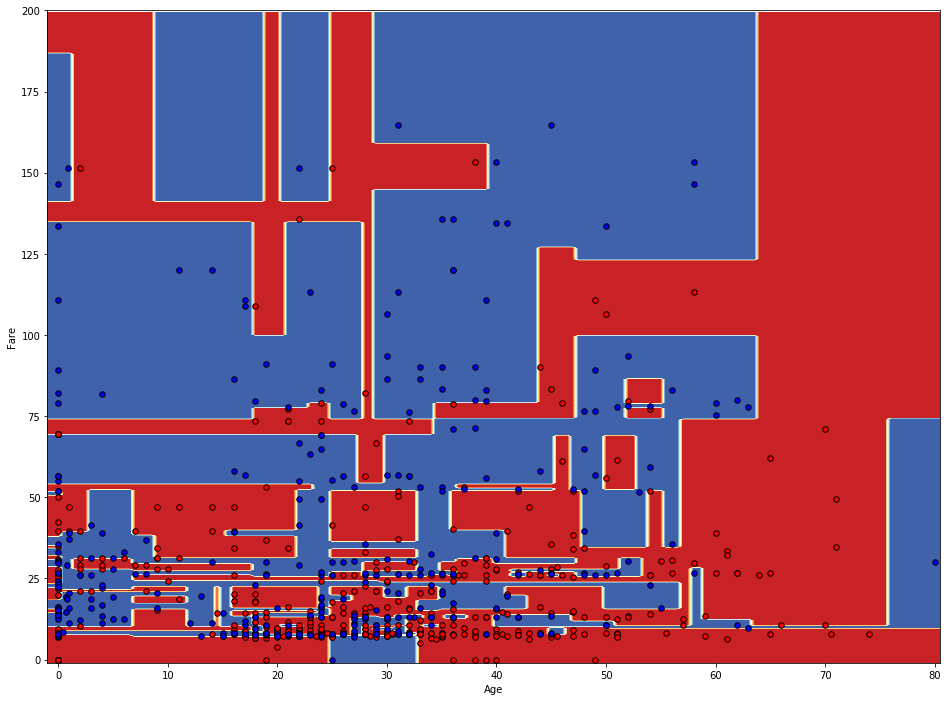

In [67]:
decision_tree = train_classifier_and_plot_decision_boundaries(df, "Age", "Fare", None)

Wow, this is a lot of decisions and some of them seem to be very interesting. They only occure because there is just someone who by chance survived or deceased eventhough one should not generate a good rule from that. The problem is we cannot always plot the decisions an algorithm took, so how can we decide if the algorithm learned something useful or not?

The solution for this is to have a [training and test set](./04-TrainTestSplit.ipynb)